In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#load excel file Employer Information
df = pd.read_excel('/content/Employer Information.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89958 entries, 0 to 89957
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Line by line                89958 non-null  object 
 1   Fiscal Year                 89958 non-null  int64  
 2   Employer (Petitioner) Name  89949 non-null  object 
 3   Tax ID                      88567 non-null  float64
 4   Industry (NAICS) Code       78573 non-null  object 
 5   Petitioner City             89958 non-null  object 
 6   Petitioner State            89958 non-null  object 
 7   Petitioner Zip Code         89956 non-null  float64
 8   Initial Approval            89958 non-null  int64  
 9   Initial Denial              89958 non-null  int64  
 10  Continuing Approval         89958 non-null  int64  
 11  Continuing Denial           89958 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 8.2+ MB


In [ ]:
# creating a column
df['Total'] = df['Continuing Approval'] + df['Initial Approval']
df.head(10)

,Line by line,Fiscal Year,Employer (Petitioner) Name,Tax ID,Industry (NAICS) Code,Petitioner City,Petitioner State,Petitioner Zip Code,Initial Approval,Initial Denial,Continuing Approval,Continuing Denial,Total
0,1,2024,1ST RANKING TECHNOLOGIES,3403.0,"54 - Professional, Scientific, and Technical S...",LEWISVILLE,TX,75067.0,4,0,3,0,7
1,2,2024,2M ASSOCIATES LLC,5521.0,"54 - Professional, Scientific, and Technical S...",DALLAS,TX,75240.0,1,0,0,0,1
2,3,2024,2M RESEARCH SERVICES LLC,3188.0,"54 - Professional, Scientific, and Technical S...",ARLINGTON,TX,76011.0,0,0,1,0,1
3,4,2024,2M SOLUTIONS INC,6900.0,56 - Administrative and Support and Waste Mana...,GRAND PRAIRIE,TX,75050.0,0,0,1,0,1
4,5,2024,3A INFOTECH LLC,6341.0,"54 - Professional, Scientific, and Technical S...",HOUSTON,TX,77069.0,5,0,0,0,5
5,6,2024,3C ENVIRONMENTAL SOLUTIONS INC,7450.0,42 - Wholesale Trade,CARROLLTON,TX,75006.0,0,0,1,0,1
6,7,2024,3C ENVIRONMENTAL SOLUTIONS INC.,7450.0,42 - Wholesale Trade,CARROLLTON,TX,75006.0,1,0,0,0,1
7,8,2024,3CORE SYSTEMS INC,1170.0,"54 - Professional, Scientific, and Technical S...",AUSTIN,TX,78758.0,0,0,4,0,4
8,9,2024,3D TECHNOLOGIES LLC,3952.0,"54 - Professional, Scientific, and Technical S...",DUNCANVILLE,TX,75116.0,3,0,2,0,5
9,10,2024,"3E MANAGEMENT, LLC",6932.0,56 - Administrative and Support and Waste Mana...,DALLAS,TX,75206.0,1,0,0,0,1


In [ ]:
df.columns

Index(['Line by line', 'Fiscal Year   ', 'Employer (Petitioner) Name',
       'Tax ID', 'Industry (NAICS) Code', 'Petitioner City',
       'Petitioner State', 'Petitioner Zip Code', 'Initial Approval',
       'Initial Denial', 'Continuing Approval', 'Continuing Denial', 'Total'],
      dtype='object')

In [ ]:
# Stripping the spaces in columns name
df.columns = df.columns.str.strip()
df.columns

Index(['Line by line', 'Fiscal Year', 'Employer (Petitioner) Name', 'Tax ID',
       'Industry (NAICS) Code', 'Petitioner City', 'Petitioner State',
       'Petitioner Zip Code', 'Initial Approval', 'Initial Denial',
       'Continuing Approval', 'Continuing Denial', 'Total'],
      dtype='object')

6. In class, we found that 'COGNIZANT' company has different names. Please replace the different names with the same name. Then using the subset, find the sum of H1B employees from each petitioner.

In [ ]:
df['Employer (Petitioner) Name'] = df['Employer (Petitioner) Name'].replace({
    'COGNIZANT TECH SOLNS US CORP': 'COGNIZANT TECHNOLOGY SOLUTIONS',
    'INFOSYS LTD': 'INFOSYS LIMITED',
    'INFOSYS TECHNOLOGIES LIMITED': 'INFOSYS LIMITED',
    'COGNIZANT TECH SOLUTIONS US CORP': 'COGNIZANT TECHNOLOGY SOLUTIONS',
    'COGNIZANT TECHNOLOGY SOLUTIONS US': 'COGNIZANT TECHNOLOGY SOLUTIONS',
    'COGNIZANT TECHNOLOGY SOLUTIONS US CORP': 'COGNIZANT TECHNOLOGY SOLUTIONS',
    '1960 PHYSICIANS ASSOCIATES INC': '1960 PHYSICIAN ASSOCIATES',
    '2920 OPEN MRI & DIGITAL IMAGING LL': '2920 OPEN MRI & DIGITAL IMAGING',
    '2920 OPEN MRI & DIGITAL IMAGING LLC': '2920 OPEN MRI & DIGITAL IMAGING',
    '3C ENVIRONMENTAL SOLUTIONS INC.': '3C ENVIRONMENTAL SOLUTIONS INC',
    '3E CLAIMS PROCESSING LLC DBA CHIRO': '3E CLAIMS PROCESSING LLC',
    '3I SOLUTIONS INC (FKA 3I CONS INC)': '3I SOLUTIONS INC',
    '3J INTERNATIONAL LTD CO DBA HIEND': '3J INTERNATIONAL LTD CO',
    '3J INTERNATIONAL LTD CO DBA HIEND ACCENTS': '3J INTERNATIONAL LTD CO',
    '3J INTL LTD CO DBA HIEND ACCENTS': '3J INTERNATIONAL LTD CO'
})

In [ ]:
df['Employer (Petitioner) Name'].unique()[:100]

array(['1ST RANKING TECHNOLOGIES', '2M ASSOCIATES LLC',
       '2M RESEARCH SERVICES LLC', '2M SOLUTIONS INC', '3A INFOTECH LLC',
       '3C ENVIRONMENTAL SOLUTIONS INC', '3CORE SYSTEMS INC',
       '3D TECHNOLOGIES LLC', '3E MANAGEMENT, LLC',
       '3J INTERNATIONAL LTD CO', '3M HEALTH INFORMATION SYSTEMS INC',
       '3S AMERICAS INC', '3S BUSINESS CORPORATION',
       '3S ENGINEERING AND DESIGN LLC', '3THIX', '4 L ENGINEERING CO',
       '4B TECHNOLOGY GROUP LLC', '4CONSULTING INC',
       '4FRONT ENGINEERED SOLUTIONS INC',
       '4M CAPITAL LTD D B A ARTERIORS HOM', '5 STAR INSTALLATIONS LLC',
       '5ELEM USA INC', '7 ELEVEN INC', '7-ELEVEN INC',
       '8ELEMENTS TECHNOLOGIES LLC', '8FOLD MGF LLC', '9M SOLUTIONS INC',
       '10BITS LLC', '12U SYSTEMS INC', '24 LOADS INC',
       '48FORTY SOLUTIONS LLC', '180 MULTI FAMILY MANAGEMENT LLC',
       '800 BUILDERS LLC', '1080MOTION INC', '1960 PHYSICIAN ASSOCIATES',
       'A & B ENVIRONMENTAL SERVICES INC', 'A & B EXCAVATION LLC',

In [ ]:
df.groupby('Employer (Petitioner) Name')['Total'].sum().reset_index().sort_values(by='Total',ascending=False).head(20)
# COGNIZANT TECHNOLOGY SOLUTIONS	- 155377

,Employer (Petitioner) Name,Total
6894,COGNIZANT TECHNOLOGY SOLUTIONS,155377
15117,INFOSYS LIMITED,143501
12790,GOOGLE INC,11576
22392,ORACLE AMERICA INC,8872
17303,KPMG LLP,7034
29925,TECH MAHINDRA AMERICAS INC,3958
10522,ERICSSON INC,3792
30400,TESLA INC,3578
13831,HEWLETT PACKARD ENTERPRISE COMPANY,3261
8183,DALLAS INDEPENDENT SCHOOL DISTRICT,3169


5. Using the subset, find the total number of H1B employees across cities. What are the top ten cities?

In [ ]:
city_totals = df.groupby('Petitioner City')['Total'].sum()

# Sort the city totals in descending order to find the top ten cities
top_ten_cities = city_totals.sort_values(ascending=False).head(10)

print("Total number of H1B employees across cities:\n", city_totals.sum())
print("\nTop ten cities with the most H1B employees:\n", top_ten_cities)


Total number of H1B employees across cities:
 703167

Top ten cities with the most H1B employees:
 Petitioner City
COLLEGE STATION    158743
PLANO              127870
HOUSTON             80775
DALLAS              70464
RICHARDSON          62344
IRVING              44559
AUSTIN              39187
FRISCO              12616
ROUND ROCK          12423
SAN ANTONIO          9015
Name: Total, dtype: int64


4. As H1B visa can only be valid for six years, we may need the most recent six years' data to estimate the current number of employees. Get the subset of the most recent six years. Using the subset, find the total number of H1B employees across industries. Which industry has the highest number of employees? Try make a graph.


Total number of H1B employees across industries (last 6 years): 292050

Industry with the highest number of employees (last 6 years): 54 - Professional, Scientific, and Technical Services (209096)





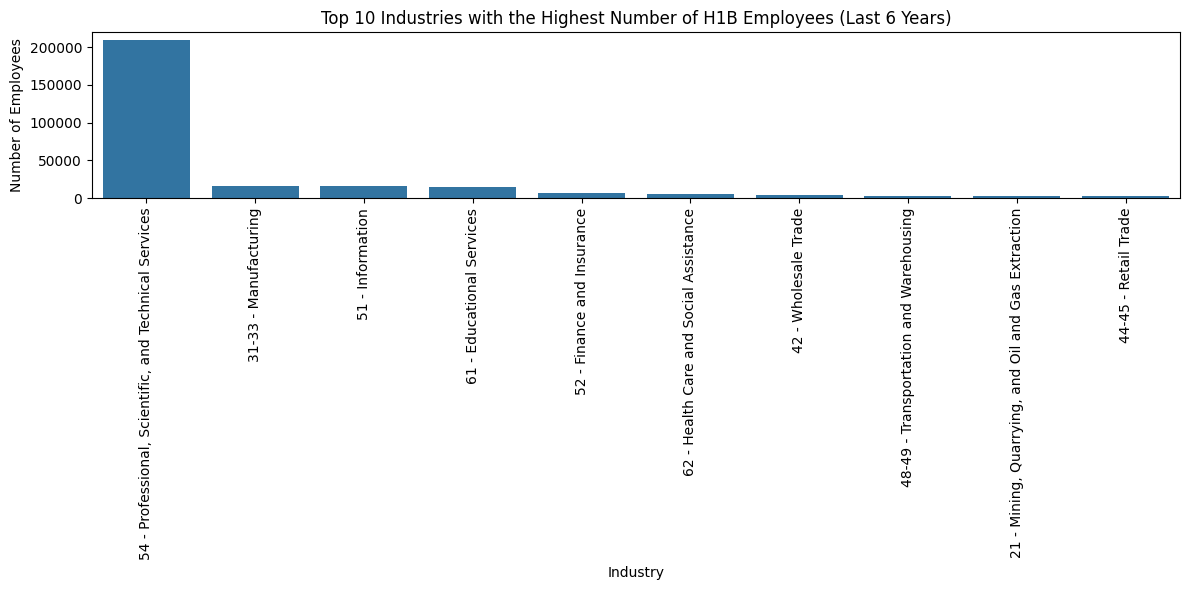

In [18]:
most_recent_year = df['Fiscal Year'].max()

cutoff_year = most_recent_year - 5
recent_df = df[df['Fiscal Year'] >= cutoff_year]

# Calculate total H1B employees across industries in the most recent six years
total_h1b_employees = recent_df['Total'].sum()
print(f"\nTotal number of H1B employees across industries (last 6 years): {total_h1b_employees}")

# Find the industry with the highest number of employees in the last six years
industry_totals = recent_df.groupby('Industry (NAICS) Code')['Total'].sum()
highest_industry = industry_totals.idxmax()
highest_industry_count = industry_totals.max()

print(f"\nIndustry with the highest number of employees (last 6 years): {highest_industry} ({highest_industry_count})")
print('\n\n')

# Make a bar plot of the top 10 industries
top_10_industries = industry_totals.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_industries.index, y=top_10_industries.values)
plt.xlabel("Industry")
plt.ylabel("Number of Employees")
plt.title("Top 10 Industries with the Highest Number of H1B Employees (Last 6 Years)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df.groupby('Fiscal Year')['Total'].sum().reset_index()

,Fiscal Year,Total
0,2009,21580
1,2010,20471
2,2011,29569
3,2012,30138
4,2013,36304
5,2014,53487
6,2015,48313
7,2016,62732
8,2017,69898
9,2018,38625


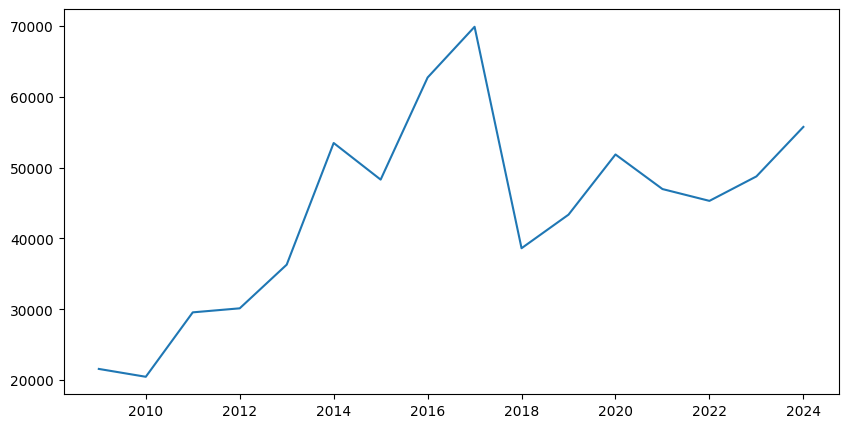

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df.groupby('Fiscal Year')['Total'].sum().reset_index()['Fiscal Year'],df.groupby('Fiscal Year')['Total'].sum().reset_index()['Total'])


1. I collected two pieces of information about Texas economic development over 2009 - 2024: GDP (tx_gdp) and Unemployment rate (tx_ur) and saved them in this csv file. Texas economy.csv Download Texas economy.csv. Import it.

In [ ]:
df_texas = pd.read_csv('/content/Texas economy.csv')
df_texas.head()

,Fiscal Year,GDP Deflator,tx_gdp,tx_ur
0,2009,88.556,1179168.1,7.591667
1,2010,89.632,1255660.8,8.250000
2,2011,91.481,1351776.9,8.033333
3,2012,93.185,1429588.0,6.708333
4,2013,94.771,1526781.9,6.316667


2.Use the variable 'GDP Deflator' to calculate the real GDP. The variable sets the 2017 dollar value at 100. By dividing the nominal GDP with this deflator, we get the real GDP, all in 2017 dollar value. Please create this real GDP variable.

In [ ]:
# Assuming 'GDP Deflator' is a column in df_texas
df_texas['Real GDP'] = df_texas['tx_gdp'] / (df_texas['GDP Deflator'] / 100)
df_texas.head()

,Fiscal Year,GDP Deflator,tx_gdp,tx_ur,Real GDP
0,2009,88.556,1179168.1,7.591667,1.331551e+06
1,2010,89.632,1255660.8,8.250000,1.400907e+06
2,2011,91.481,1351776.9,8.033333,1.477659e+06
3,2012,93.185,1429588.0,6.708333,1.534140e+06
4,2013,94.771,1526781.9,6.316667,1.611022e+06


 3. Calculate the numbers of Initial Approvals and Continuing Approvals of every year. Make graphs that compare each of them with Texas GDP and unemployment rate. What do you find?

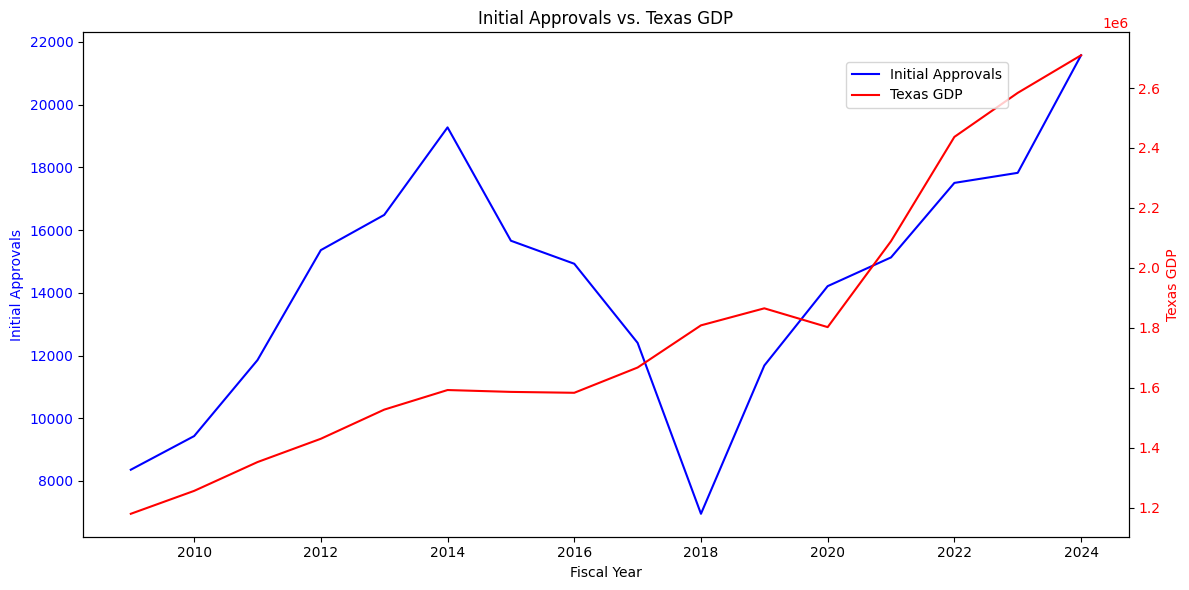

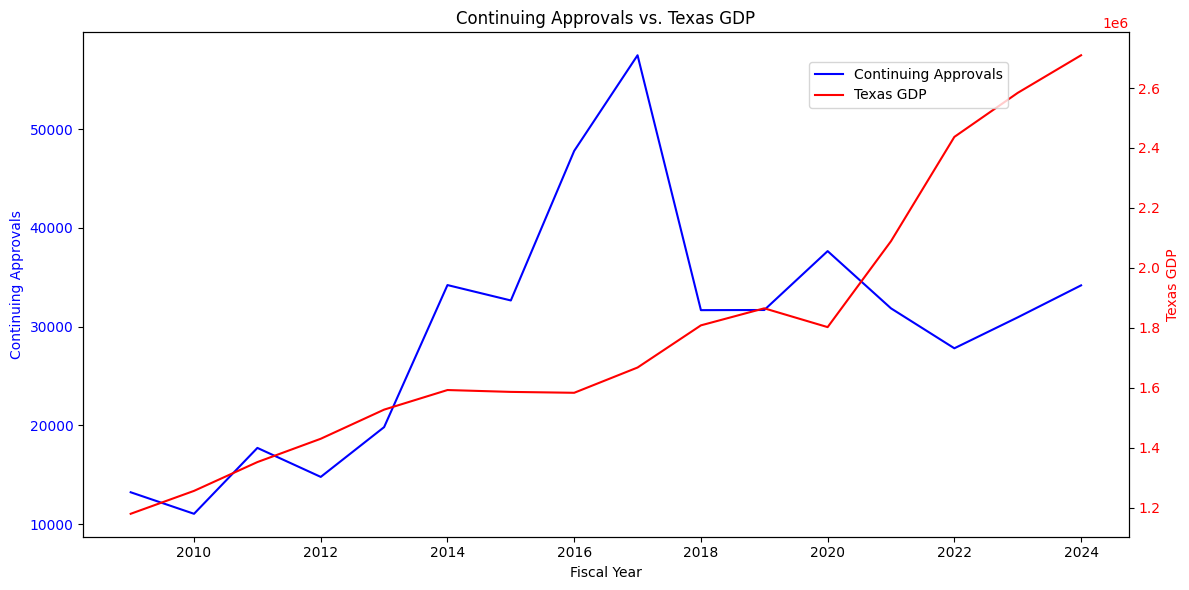

In [ ]:
approval_by_year = df.groupby('Fiscal Year').agg({'Initial Approval': 'sum', 'Continuing Approval': 'sum'}).reset_index()

merged_df = pd.merge(approval_by_year, df_texas, left_on='Fiscal Year', right_on='Fiscal Year', how='left')

# Plotting
# Initial Approval vs. Texas GDP
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(merged_df['Fiscal Year'], merged_df['Initial Approval'], label='Initial Approvals', color='blue')
ax1.set_xlabel('Fiscal Year')
ax1.set_ylabel('Initial Approvals', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(merged_df['Fiscal Year'], merged_df['tx_gdp'], label='Texas GDP', color='red')
ax2.set_ylabel('Texas GDP', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Initial Approvals vs. Texas GDP')
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.9))
plt.tight_layout()
plt.show()

# Continuing Approvals vs. Texas GDP
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(merged_df['Fiscal Year'], merged_df['Continuing Approval'], label='Continuing Approvals', color='blue')
ax1.set_xlabel('Fiscal Year')
ax1.set_ylabel('Continuing Approvals', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(merged_df['Fiscal Year'], merged_df['tx_gdp'], label='Texas GDP', color='red')
ax2.set_ylabel('Texas GDP', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Continuing Approvals vs. Texas GDP')
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.9))
plt.tight_layout()
plt.show()

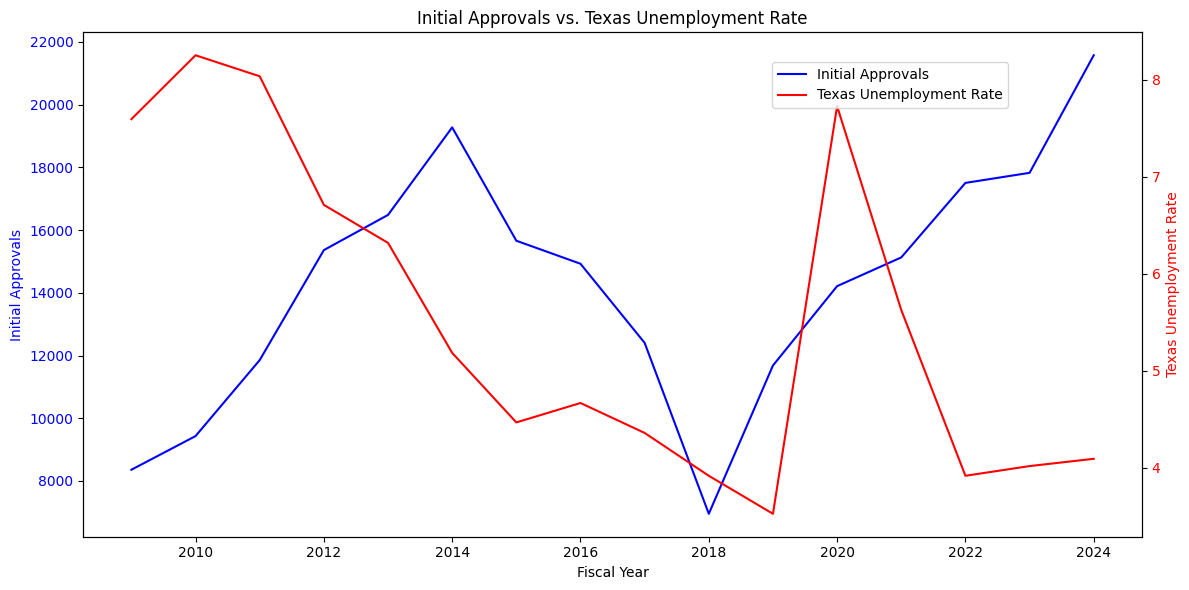

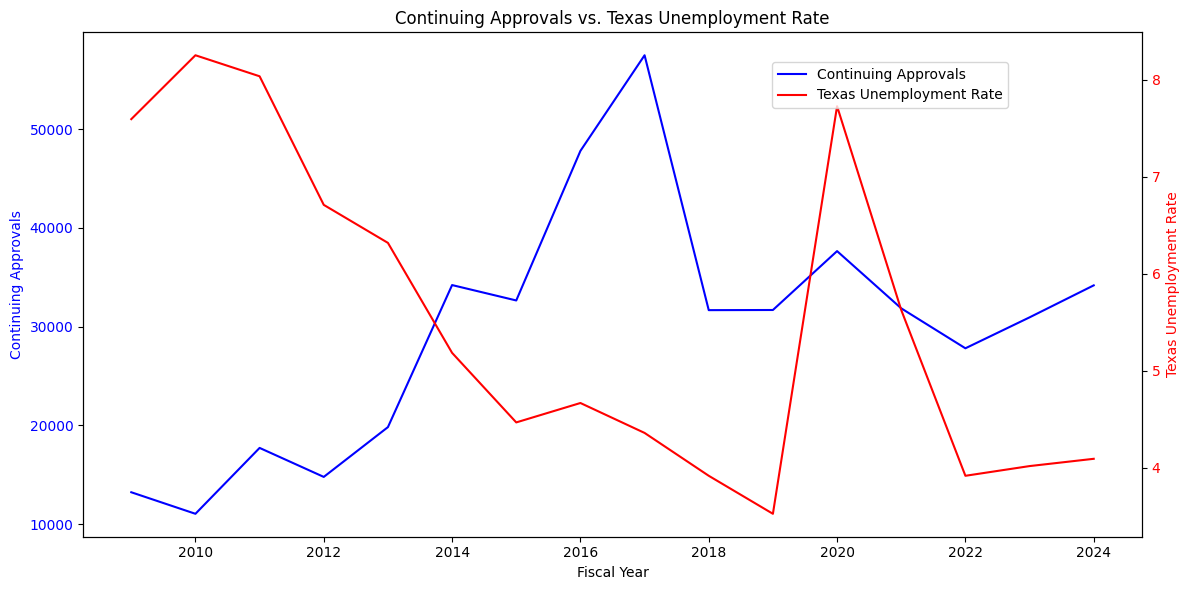

In [ ]:
# Initial Approvals vs. Texas Unemployment Rate
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(merged_df['Fiscal Year'], merged_df['Initial Approval'], label='Initial Approvals', color='blue')
ax1.set_xlabel('Fiscal Year')
ax1.set_ylabel('Initial Approvals', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(merged_df['Fiscal Year'], merged_df['tx_ur'], label='Texas Unemployment Rate', color='red')
ax2.set_ylabel('Texas Unemployment Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Initial Approvals vs. Texas Unemployment Rate')
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.9))
plt.tight_layout()
plt.show()

# Continuing Approvals vs. Texas Unemployment Rate
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(merged_df['Fiscal Year'], merged_df['Continuing Approval'], label='Continuing Approvals', color='blue')
ax1.set_xlabel('Fiscal Year')
ax1.set_ylabel('Continuing Approvals', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(merged_df['Fiscal Year'], merged_df['tx_ur'], label='Texas Unemployment Rate', color='red')
ax2.set_ylabel('Texas Unemployment Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Continuing Approvals vs. Texas Unemployment Rate')
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.9))
plt.tight_layout()
plt.show()

**1. Continuing Approvals vs. Texas GDP**

Continuing Approvals (blue line, left axis): Generally trends upward from 2009 to 2017, peaks around 2017, then fluctuates but remains relatively high.

Texas GDP (red line, right axis): Shows a steady increase over time, with a slight dip around 2020, then a strong recovery and continued growth.

Key Observations:
1. Texas GDP and continuing approvals both generally rose over the long term, but GDP is more consistently upward, while approvals are more volatile.
2. The 2020 dip in GDP aligns with the pandemic, but GDP recovers quickly, while continuing approvals take longer to rebound.
3. The overall positive trend in both metrics suggests a growing economy with increasing program participation or approvals.

**2. Initial Approvals vs. Texas GDP**

Initial Approvals (blue line, left axis): Shows an upward trend from 2009 to 2014, a decline until 2018, followed by a sharp increase in later years.

Texas GDP (red line, right axis): Displays a steady increase over time, with a slight flattening around 2020, then a strong recovery and continued growth.

Key Observations:
1. From 2009-2014, both initial approvals and Texas GDP generally increased.
2. Between 2014 and 2018, initial approvals declined while GDP continued to rise.
3. Both metrics showed strong growth after 2020, indicating a potential relationship between initial approvals and economic expansion.

**3. Continuing Approvals vs. Texas Unemployment Rate**

Continuing Approvals (blue line, left axis): This metric generally trends upward from 2009 to 2017, peaks around 2017, then fluctuates but remains relatively high.

Texas Unemployment Rate (red line, right axis): This rate starts high in 2009–2010, then steadily declines until 2019, with a sharp spike in 2020 (likely due to the COVID-19 pandemic), before dropping again.

Key Observations:
1. There is an inverse relationship in many years: as unemployment falls, continuing approvals rise, especially from 2012 to 2017.
2. The 2020 spike in unemployment coincides with a dip in continuing approvals, possibly reflecting economic disruption.
3. After 2020, unemployment drops sharply, while continuing approvals recover and stabilize.

**4. Initial Approvals vs. Texas Unemployment Rate**

Initial Approvals (blue line, left axis): Shows a similar pattern as described above, with an initial rise, a decline, and then a sharp increase.

Texas Unemployment Rate (red line, right axis): Starts high in 2009-2010, steadily declines until 2019, spikes in 2020, and then drops again.

Key Observations:
1. There is an inverse relationship between unemployment and initial approvals in many periods.
2. The unemployment spike in 2020 coincides with a dip in initial approvals, reflecting the impact of the pandemic.
3. After 2020, as unemployment drops, initial approvals rise sharply, suggesting a correlation between economic recovery and increased initial approvals.